## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from pathlib import Path

## Load dataset

In [2]:
path = Path().cwd()
data_file = path.parent / "Data" / "Synthetic2DNoOverlapp.csv"

T = pd.read_csv(data_file, header=None)

X = np.array(T.loc[:, T.columns != 2])
y = np.array(T.loc[:, T.columns == 2]).T.reshape(40,1)

data_file_overlap = path.parent / "Data" / "Synthetic2DOverlap.csv"
T_overlap = pd.read_csv(data_file_overlap, header=None)

X_overlap = np.array(T_overlap.loc[:, T_overlap.columns != 2])
y_overlap = np.array(T_overlap.loc[:, T_overlap.columns == 2]).T.reshape(200,1)

## Helper Functions

In [3]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

### 2 Apply and interpret Optimal Separating Hyperplanes (OSH):
> a) Compute OSH solutions for the non-overlapping 2D data in synthetic_2D_nool_1.csv.
Play around with different choices of the kernel type (linear, polynomial, or gaussian)
and the kernel parameter (the standard deviation for the Gaussian kernel or the
degree for the polynomial kernel).

In [ ]:
kernelType = 'poly'  # <----- YOUR CHOICE. Specifies the kernel type to be used in the algorithm. 
                    # It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
                    # If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute
                    # the kernel matrix from data matrices; that matrix should be an array of shape 
                    # (n_samples, n_samples).

degreeVal = 3   # <----- YOUR CHOICE. Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

gammaVal = 'scale'   # <----- YOUR CHOICE. Kernel coefficient for (‘rbf’), (‘poly’) and (‘sigmoid’). Use 'scale' for default. Ignored by all other kernels.

clf = SVC(degree=degreeVal, gamma=gammaVal, C=1e6, kernel=kernelType)

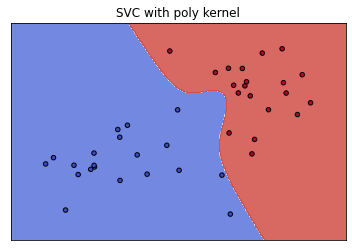

In [5]:
# title for the plots
title = 'SVC with %s kernel' % kernelType
        
# Set-up 2x2 grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.subplot(111)
plot_contours(ax, clf.fit(X,y.ravel()), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y.T.tolist()[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

> b) Compute OSH solutions for the overlapping 2D data in synthetic_2D_ol_1.csv.
Using a Gaussian kernel, try to find a value of the kernel parameter that leads to
an acceptable separation between the two classes. What do you think about the
generalization ability of your solution?

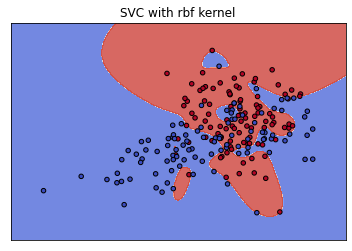

In [7]:
# Try different values for the kernel parameter
gammaVal = 'scale'   # <----- YOUR CHOICE. Kernel coefficient for (‘rbf’), (‘poly’) and (‘sigmoid’). Use 'scale' for default. Ignored by all other kernels.

# Estimate model
clf = SVC(C=999999, gamma=gammaVal, kernel='rbf') #Setting C=np.inf you will find that it cannot find a solution. Thus it cannot find an OSH.

# Plot classes
# title for the plots
title = 'SVC with rbf kernel'
        
# Set-up 2x2 grid for plotting.

X0, X1 = X_overlap[:, 0], X_overlap[:, 1]
xx, yy = make_meshgrid(X0, X1)

ax = plt.subplot(111)
plot_contours(ax, clf.fit(X_overlap,y_overlap.ravel()), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_overlap.T.tolist()[0], cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()